In [279]:
import math
import dataclasses
import collections
import datetime

import pandas as pd
import numpy as np
import plotly.express as px

In [281]:
covid19 = pd.read_csv('covid19.csv.gz', dtype_backend = 'pyarrow', parse_dates = ['date'])

In [285]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156710 entries, 0 to 156709
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   country                     156710 non-null  string[pyarrow]
 1   date                        156710 non-null  datetime64[ns] 
 2   continent                   156710 non-null  string[pyarrow]
 3   population                  156710 non-null  int64[pyarrow] 
 4   life_expectancy             151672 non-null  double[pyarrow]
 5   gdp_per_capita              148190 non-null  int64[pyarrow] 
 6   population_density          156710 non-null  double[pyarrow]
 7   median_age                  156710 non-null  double[pyarrow]
 8   extreme_poverty             137966 non-null  double[pyarrow]
 9   human_development_index     156710 non-null  double[pyarrow]
 10  hospital_beds_per_thousand  122630 non-null  double[pyarrow]
 11  percent_fully_vaccinated  

In [323]:
final = covid19.groupby('country').last()
final

,date,continent,population,life_expectancy,gdp_per_capita,population_density,median_age,extreme_poverty,human_development_index,hospital_beds_per_thousand,percent_fully_vaccinated,total_cases,total_deaths,total_excess
country,,,,,,,,,,,,,,
Afghanistan,2024-09-08,Asia,40578846,61.9824,1516,62.215546,16.752,<NA>,0.462,0.39,45.270844,235213,7998,<NA>
Algeria,2024-09-08,Africa,45477391,61.6609,11198,19.09418,27.983,0.455468,0.745,1.9,14.251447,272156,6881,126117
Angola,2024-09-08,Africa,35635028,76.4626,5906,28.583483,16.39,31.122005,0.591,<NA>,26.965265,107481,1937,<NA>
Argentina,2024-09-08,South America,45407904,76.3767,22461,16.592274,31.739,<NA>,0.849,4.99,76.860214,10102033,130671,186306
Australia,2024-09-08,Oceania,26200987,72.5398,51090,3.406256,37.512,0.497094,0.946,3.84,82.62102,11861160,25236,36645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2024-09-08,South America,28213016,80.1106,<NA>,31.985733,28.81,<NA>,0.699,0.87,53.048817,552694,5856,<NA>
Vietnam,2024-09-08,Asia,99680656,72.3542,11396,318.03265,31.938,0.963795,0.726,2.6,86.23695,11623999,43206,<NA>
Yemen,2024-09-08,Asia,38222880,74.9362,<NA>,72.395935,18.118,19.802757,0.424,0.71,2.11145,11945,2159,<NA>


In [329]:
# Top 10 countries with the highest total case counts

In [311]:
final.total_cases.nlargest(10)

country
United States     103436827
China              99379132
India              45042835
France             38997489
Germany            38437755
Brazil             37511921
South Korea        34571873
Japan              33803571
Italy              26826486
United Kingdom     24983908
Name: total_cases, dtype: int64[pyarrow]

reveals that the United States had the highest number of cases

In [331]:
# alternative code

final.total_cases.sort_values().tail(10)

country
United Kingdom     24983908
Italy              26826486
Japan              33803571
South Korea        34571873
Brazil             37511921
Germany            38437755
France             38997489
India              45042835
China              99379132
United States     103436827
Name: total_cases, dtype: int64[pyarrow]

In [335]:
# above output looks too raw, for more readable format using dataframe

pd.DataFrame(final.total_cases.nlargest(10))

,total_cases
country,
United States,103436827
China,99379132
India,45042835
France,38997489
Germany,38437755
Brazil,37511921
South Korea,34571873
Japan,33803571
Italy,26826486


In [368]:
# Top 10 Countries Reporting the Highest COVID-19 Cases and Their Total Deaths

pd.DataFrame(final[['total_cases', 'total_deaths']].nlargest(10, 'total_cases')).style.format('{:,d}')

,total_cases,total_deaths
country,,
United States,"103,436,827","1,127,911"
China,"99,379,132","122,351"
India,"45,042,835","533,636"
France,"38,997,489","167,985"
Germany,"38,437,755","174,979"
Brazil,"37,511,921","702,116"
South Korea,"34,571,873","35,934"
Japan,"33,803,571","74,694"
Italy,"26,826,486","197,542"


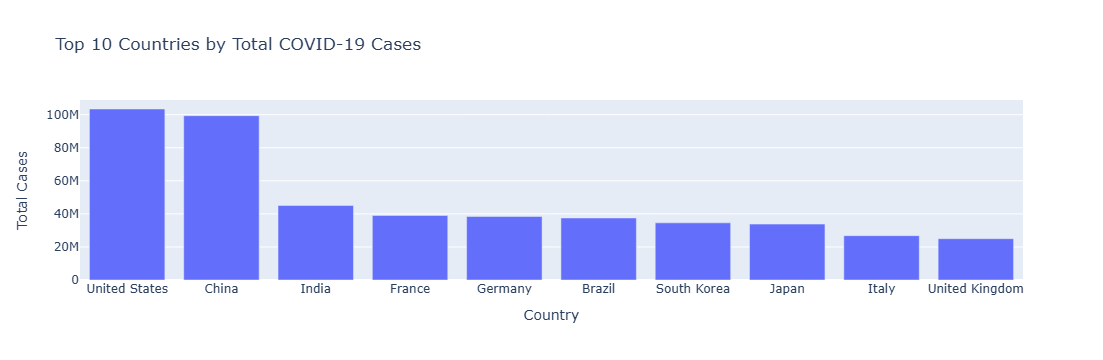

In [325]:
px.bar(
    final.total_cases.nlargest(10).reset_index(),
    x='country',
    y='total_cases',
    title='Top 10 Countries by Total COVID-19 Cases',
    labels={'total_cases': 'Total Cases', 'country': 'Country'}
)

In [378]:
# custom helper functions to format column with commas and no decimals

pd.Series.nice = lambda series, format= '{:,.0f}': pd.DataFrame(series).style.format(format)
pd.DataFrame.nice = lambda frame, format= '{:,.0f}': frame.style.format(format)

In [388]:
#final.total_cases.nlargest(10).nice()
pd.DataFrame(final.total_cases.sort_values().tail(10))

,total_cases
country,
United Kingdom,24983908
Italy,26826486
Japan,33803571
South Korea,34571873
Brazil,37511921
Germany,38437755
France,38997489
India,45042835
China,99379132


In [390]:
final.nlargest(10, columns = 'total_deaths')[['total_cases','total_deaths']].nice()

,total_cases,total_deaths
country,,
United States,"103,436,827","1,127,911"
Brazil,"37,511,921","702,116"
India,"45,042,835","533,636"
Russia,"24,334,446","403,292"
Mexico,"7,621,651","334,714"
United Kingdom,"24,983,908","232,112"
Peru,"4,526,976","220,975"
Italy,"26,826,486","197,542"
Germany,"38,437,755","174,979"


United States reports the highest number of COVID-19 deaths, this is obvious considering that countries with larger populations (e.g., the US) may naturally have higher numbers of cases and deaths

In [1]:
# To account for population size, created a new columns to calculate cases per million and deaths per million. 
# This normalization will provide a more accurate comparison across countries of varying population sizes.

In [407]:
final['cases_per_million'] = final.total_cases / (final.population / 1000000)
final['deaths_per_million'] = final.total_deaths / (final.population / 1.0e6)

In [409]:
final.cases_per_million

country
Afghanistan      5796.443792
Algeria          5984.424216
Angola           3016.161514
Argentina      222473.008223
Australia      452698.976569
                   ...      
Venezuela       19590.036032
Vietnam        116612.384654
Yemen             312.509157
Zambia           17360.64833
Zimbabwe        16577.695486
Name: cases_per_million, Length: 93, dtype: double[pyarrow]

In [419]:
final.nlargest(10, 'deaths_per_million')[['cases_per_million', 'deaths_per_million']].nice()

,cases_per_million,deaths_per_million
country,,
Peru,"135,233","6,601"
Czechia,"446,657","4,079"
Greece,"546,852","3,789"
Romania,"185,760","3,594"
United Kingdom,"366,444","3,404"
Brazil,"178,368","3,339"
Italy,"449,965","3,313"
United States,"302,859","3,302"
Chile,"276,258","3,209"


In [436]:
# Death Rate Analysis [death rate (deaths divided by cases)]- to further explore the severity of the pandemic’s impact in different countries. 

In [448]:
final.nlargest(10, 'deaths_per_million')[['cases_per_million', 'deaths_per_million']] \
.assign(death_rates = lambda rrr: 100 * rrr.deaths_per_million / rrr.cases_per_million).nice('{:,.1f}')

,cases_per_million,deaths_per_million,death_rates
country,,,
Peru,"135,232.8","6,601.1",4.9
Czechia,"446,656.9","4,078.5",0.9
Greece,"546,851.8","3,788.8",0.7
Romania,"185,759.8","3,594.4",1.9
United Kingdom,"366,444.1","3,404.4",0.9
Brazil,"178,367.9","3,338.5",1.9
Italy,"449,964.6","3,313.4",0.7
United States,"302,859.5","3,302.5",1.1
Chile,"276,258.1","3,208.9",1.2


Peru stands out with an exceptionally high death rate compared to other countries. Potential reasons could be: 
- Healthcare challenges: Peru may have faced issues in healthcare infrastructure, making it harder to manage the pandemic.
- Under-reporting of cases: It's possible that the number of reported cases in Peru was lower than the actual number, while the number of deaths was more accurately reported.

In [458]:
# Excess Deaths, to compare the cumulative deaths during the pandemic with an expected baseline (based on historical data for previous years). 
# Excess death per million will provide clear sense of the total impact (pandemic) on public health in different countries

In [450]:
final['excess_per_million'] = final.total_excess / (final.population / 1.e06)

In [454]:
final.nlargest(10, 'excess_per_million')[['cases_per_million', 'deaths_per_million', 'excess_per_million']].nice()

,cases_per_million,deaths_per_million,excess_per_million
country,,,
Russia,"167,155","2,770","9,272"
Peru,"135,233","6,601","6,003"
Bolivia,"100,367","1,854","5,288"
Cuba,"100,694",771,"5,125"
Mexico,"59,260","2,602","5,044"
South Africa,"65,292","1,645","4,960"
Romania,"185,760","3,594","4,822"
Ecuador,"60,594","2,023","4,807"
Ukraine,"134,893","2,678","4,384"


Here, Peru shows an interesting pattern, where excess deaths are lower than the reported COVID deaths, suggesting possible under-reporting of cases.

Also, countries with high excess death numbers, such as Russia, Bolivia, and several Central American nations, indicate that these regions suffered disproportionately due to the pandemic's wide-reaching consequences.